# Store the node features & edge properties in the graph:

In [50]:
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from grace.base import GraphAttrs
from grace.io.image_dataset import ImageGraphDataset

from grace.io.store_node_features import store_node_features_in_graph
from grace.io.store_edge_properties import store_edge_properties_in_graph

from grace.models.datasets import dataset_from_graph

In [2]:
extractor_fn = "/Users/kulicna/Desktop/classifier/extractor/resnet152.pt"
data_path = "/Users/kulicna/Desktop/dataset/playground/infer/"
data_path, extractor_fn

('/Users/kulicna/Desktop/dataset/playground/infer/',
 '/Users/kulicna/Desktop/classifier/extractor/resnet152.pt')

In [3]:
# store_node_features_in_graph(data_path, extractor_fn)

In [4]:
# store_edge_properties_in_graph(data_path=data_path)

# Unwrap the graph:

In [5]:
dataset = ImageGraphDataset(
    image_dir=data_path, 
    grace_dir=data_path, 
)
image, target = dataset[0]
G = target["graph"]
G.number_of_nodes(), G.number_of_edges()

10/06/2023 04:01:01 PM MRC_Synthetic_File_002
10/06/2023 04:01:01 PM Nodes count | [97, 102, 0] x | [48.74, 51.26, 0.0] %
10/06/2023 04:01:01 PM Edges count | [452, 127, 0] x | [78.07, 21.93, 0.0] %
10/06/2023 04:01:01 PM Relabelled 'Annotation.UNKNOWN'
10/06/2023 04:01:01 PM Nodes count | [97, 102, 0] x | [48.74, 51.26, 0.0] %
10/06/2023 04:01:01 PM Edges count | [452, 127, 0] x | [78.07, 21.93, 0.0] %


(199, 579)

In [6]:
for src, dst, edge in G.edges(data=True):
    print (src, dst, edge)
    print (edge[GraphAttrs.EDGE_PROPERTIES])
    break


0 9 {<GraphAttrs.EDGE_GROUND_TRUTH: 'edge_ground_truth'>: <Annotation.TRUE_NEGATIVE: 0>, <GraphAttrs.EDGE_PROPERTIES: 'edge_properties'>: Properties(properties_dict={'src_pos_x_raw': 3539.7954, 'src_pos_y_raw': 203.28735, 'dst_pos_x_raw': 2021.5538, 'dst_pos_y_raw': 150.96632, 'mid_pos_x_raw': 2780.6746, 'mid_pos_y_raw': 177.12683, 'edge_length_raw': 1519.1428, 'edge_orientation_radians': 1.5071831, 'edge_orientation_degrees': 86.355225, 'east_pos_x_raw': 2439.3552, 'east_pos_y_raw': 291.55084, 'east_to_mid_length_raw': 359.9886, 'east_to_mid_orient_raw': 1.481252, 'east_triangle_area_raw': 95790.734, 'west_pos_x_raw': 2780.6746, 'west_pos_y_raw': 177.12683, 'west_to_mid_length_raw': 0.0, 'west_to_mid_orient_raw': 0.0, 'west_triangle_area_raw': 0.0, 'edge_length_nrm': 5.2260695, 'west_to_mid_length_nrm': 0.0, 'east_to_mid_length_nrm': 1.2384124, 'west_triangle_area_nrm': 0.0, 'east_triangle_area_nrm': 3.4430425}, properties_keys=None, properties_vals=None)}
Properties(properties_dict={

In [7]:
uniqueness = set([len(edge[GraphAttrs.EDGE_PROPERTIES].property_keys) for _, _, edge in G.edges(data=True)])
uniqueness

{24}

## Build the dataset:

In [9]:
data_list = dataset_from_graph(G, mode="sub")
data_list[0]

Data(x=[7, 2048], edge_index=[2, 11], y=[7], edge_label=[11], edge_properties=[11, 8])

In [17]:
num_properties = data_list[0].edge_properties.shape[-1]
num_features = data_list[0].x.shape[-1]
num_properties, num_features


(8, 2048)

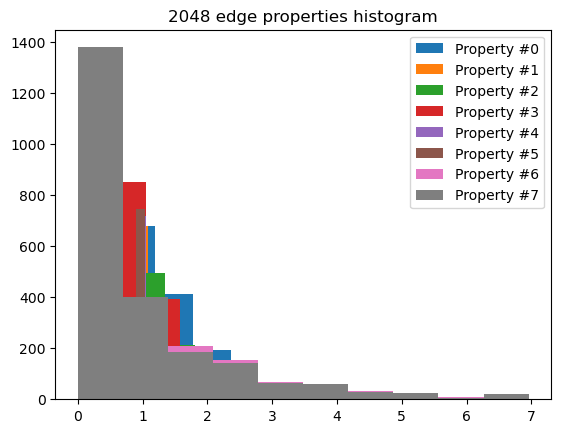

In [24]:
for i in range(num_properties):
    props = []
    for data in data_list:
        props.extend(data.edge_properties[:, i].tolist())
    plt.hist(props, label=f"Property #{i}")
plt.title(f"{num_features} edge properties histogram")
plt.legend()
plt.show()


100%|██████████| 2048/2048 [00:14<00:00, 145.31it/s]


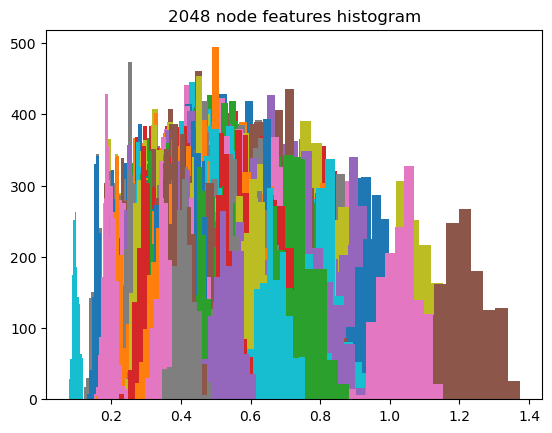

In [25]:
for i in tqdm(range(num_features)):
    props = []
    for data in data_list:
        props.extend(data.x[:, i].tolist())
    plt.hist(props)

plt.title(f"{num_features} node features histogram")
plt.show()


##### Done!